### Project Brief

#### BART Background

BART started service in 1972 and has grown to service 50 station across five counties. It joins San Francisco International Airport, Oakland International Airport, with San Francisco Downtown, and Oakland Downtown. Currently, BART operates from 5am-12am. 

The following analysis is based on a single dataset, procured from Kaggle. Its author is BART. The data tracks the bart ticket scans as a rider travels a trip. The rider scans at their origin station, and once again, at their destination station. The data summarizes the total trips per hour per unique combination of origin and destination station. 

The data encapsulates all rider data from January 1st, 2011 to May 31st, 2023. 


# BART RIDERSHIP in the past twelve years

In [614]:
import pandas as pd
import numpy as np
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib
import scipy.stats as stats

In [615]:
import os
if not os.path.exists("images"):
    os.mkdir("images")

#### 2011-2024 Ridership

In [616]:
#example of data
csv2011 = pd.read_csv('date-hour-soo-dest-2011.csv')
csv2011.head(2)

,Date,Hour,Origin Station,Destination Station,Trip Count
0,2011-01-01,0,12TH,12TH,1
1,2011-01-01,0,12TH,16TH,1


In [617]:
#Importing files in a loop, cleaning, and appending them. 
bart_summary = []
for i in list(range(2011,2024,1)):
    df = pd.read_csv('date-hour-soo-dest-' + str(i) + '.csv')
    df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
    df['Month'] = df['Date'].dt.month
    df['Month Name'] = df['Date'].dt.month_name()
    df['Year'] = df['Date'].dt.year
    bart_summary.append(df.groupby(['Year','Month Name','Month'])['Trip Count'].sum().reset_index())

In [631]:
#concat files
trips_month = pd.concat(bart_summary)[['Year','Month Name','Month','Trip Count']].groupby(
    ['Year','Month','Month Name'])['Trip Count'].sum().reset_index().sort_values(by=['Year','Month'])#.reset_index()
trips_month['Date'] = trips_month['Month Name'] + " " + trips_month['Year'].astype(str)

In [632]:
#Trimmed dataset Total Trips, Month, Year

trips_month = trips_month.drop([trips_month.shape[0]-1])
trips_month

,Year,Month,Month Name,Trip Count,Date
0,2011,1,January,8203563,January 2011
1,2011,2,February,7933264,February 2011
2,2011,3,March,9049039,March 2011
3,2011,4,April,8824840,April 2011
4,2011,5,May,8940380,May 2011
...,...,...,...,...,...
143,2022,12,December,3403625,December 2022
144,2023,1,January,3417241,January 2023
145,2023,2,February,3581426,February 2023
146,2023,3,March,4116038,March 2023


In [620]:
#Import the last of May2023 - April 2024

added_months = []
for k,v in {'May':'202305','June':'202306','July':'202307','August':'202308','September':'202309','October':'202310','November':'202311','December':'202312'}.items():
    tdf = pd.pandas.read_excel('ridership_2023/Ridership_' + v + '.xlsx', header = 1, index_col=0, sheet_name = 'Total Trips OD')
    date = dt.datetime.strptime(v, "%Y%m")
    temp_list = [2023, date.month, k, tdf.loc['Entries','Exits'], k + ' ' + str(date.year)]
    added_months.append(temp_list)
for k,v in {'January':'202401','February':'202402','March':'202403','April':'202404'}.items():
    tdf = pd.pandas.read_excel('ridership_2023/Ridership_' + v + '.xlsx', header = 1, index_col=0, sheet_name = 'Total Trips',skiprows=3)
    date = dt.datetime.strptime(v, "%Y%m")
    temp_list = [2024, date.month, k, tdf.loc['Grand Total','Unnamed: 51'], k + ' ' + str(date.year)]
    added_months.append(temp_list)
added_months = pd.DataFrame(added_months, columns = ['Year', 'Month', 'Month Name', 'Trip Count', 'Date'])
added_months


,Year,Month,Month Name,Trip Count,Date
0,2023,5,May,4133709,May 2023
1,2023,6,June,4159215,June 2023
2,2023,7,July,3916452,July 2023
3,2023,8,August,4477455,August 2023
4,2023,9,September,4202723,September 2023
5,2023,10,October,4432027,October 2023
6,2023,11,November,3980362,November 2023
7,2023,12,December,3625983,December 2023
8,2024,1,January,3844643,January 2024
9,2024,2,February,3917031,February 2024


In [633]:
#Combine all data
trips_month = pd.concat([trips_month,added_months])
trips_month.tail(2)

,Year,Month,Month Name,Trip Count,Date
10,2024,3,March,4169897,March 2024
11,2024,4,April,4223784,April 2024


In [622]:
#Added Stats pre-2020
pre2020_mean = trips_month[trips_month['Year']<2020].groupby('Year')['Trip Count'].sum().describe().loc['mean']
pre2020_std = trips_month[trips_month['Year']<2020].groupby('Year')['Trip Count'].sum().describe().loc['std']
total_2019 = trips_month[trips_month['Year']==2019].groupby('Year')['Trip Count'].sum().describe().loc['mean']
total_2020 = trips_month[trips_month['Year']==2020].groupby('Year')['Trip Count'].sum().describe().loc['mean']
total_2021 = trips_month[trips_month['Year']==2021].groupby('Year')['Trip Count'].sum().describe().loc['mean']
total_2016 = trips_month[trips_month['Year']<2020].groupby('Year')['Trip Count'].sum().describe().loc['max']
total_2022 = trips_month[trips_month['Year']==2022].groupby('Year')['Trip Count'].sum().describe().loc['mean']


print(bool(pre2020_mean-pre2020_std-total_2019 > 0)) #2019 within 1 std of the 2011-2019 sample. 
print('pre2020_mean ', str(pre2020_mean), '\npre2020_std ', str(pre2020_std),'\ntotal_2019 ',str(total_2019),
      '\ntotal_2020 ', str(total_2020),'\ntotal_2021 ',str(total_2021), '\n2021 / pre-2020 mean ', str(total_2021/pre2020_mean*100),
     '\n2021 by 2016(max)',str(total_2021/total_2016*100), '\ntotal_2016', str(total_2016), 
      '\n2019/2016',str((total_2016-total_2019)/total_2016), '\ntotal_2022', str(total_2022), 
      '\n2022/pre-2020 mean ', str(total_2022/pre2020_mean)
      )

False
pre2020_mean  120096302.77777778 
pre2020_std  6788835.11773612 
total_2019  118609605.0 
total_2020  31426279.0 
total_2021  24964402.0 
2021 / pre-2020 mean  20.786986295650838 
2021 by 2016(max) 19.471750765728462 
total_2016 128208307.0 
2019/2016 0.07486801927740923 
total_2022 41986747.0 
2022/pre-2020 mean  0.3496089890268386


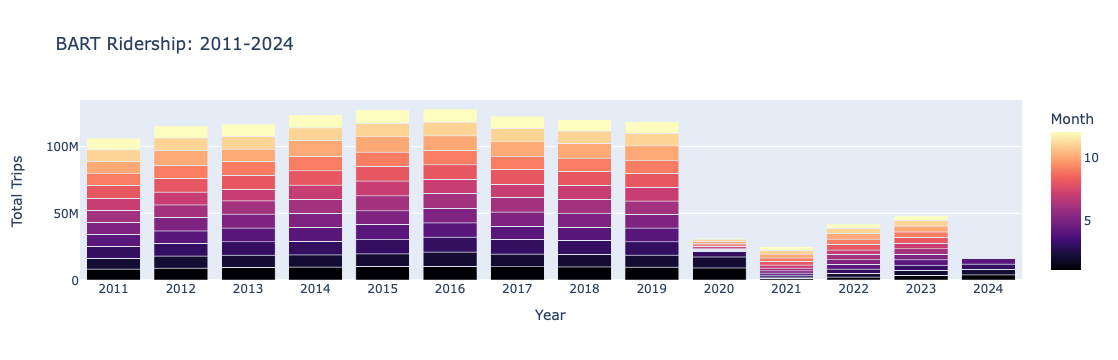

In [623]:
#Visualization: Bart 2011-2023 by Year (Months as colors)
trend = px.bar(trips_month, x='Year', 
             y='Trip Count', color = "Month", 
             labels={"Trip Count":"Total Trips"}, 
             title = "BART Ridership: 2011-2024",
             color_continuous_scale="Magma",
               
            )
trend.update_xaxes(type = 'category')
trend.show()
trend.write_image("images/2011_2023.png")
trend.write_image("images/2011_2023.svg")

In [635]:
#Significant changes to ridership (P Values)
p_val = []
for i in range(trips_month['Year'].value_counts().index.shape[0]-1):
    int_list = [stats.ttest_ind(
                    a=trips_month[trips_month['Year'] == trips_month['Year'].value_counts().index[i]]['Trip Count'], 
                    b=trips_month[trips_month['Year'] == trips_month['Year'].value_counts().index[i+1]]['Trip Count'], 
                    equal_var=True)[1].round(2),
                trips_month['Year'].value_counts().index[i], 
                trips_month['Year'].value_counts().index[i+1],
               trips_month.groupby(['Year','Month'])['Trip Count'].sum().groupby(['Year']).mean().round().iloc[i+1]]
    p_val.append(int_list)
pd.DataFrame(p_val, columns = ('p_value', 'Year_1','Year_2', 'Month Avg'))

,p_value,Year_1,Year_2,Month Avg
0,0.00,2011,2012,9620455.0
1,0.63,2012,2013,9747386.0
2,0.04,2013,2014,10337743.0
3,0.24,2014,2015,10646746.0
4,0.86,2015,2016,10684026.0
5,0.04,2016,2017,10239922.0
6,0.45,2017,2018,10043220.0
7,0.55,2018,2019,9884134.0
8,0.00,2019,2020,2618857.0
9,0.55,2020,2021,2080367.0


In [637]:
# Avg monthly ridership by year
trips_month.groupby(['Year','Month'])['Trip Count'].sum().groupby(['Year']).mean()#.round().iloc[0]

Year
2011    8.868596e+06
2012    9.620455e+06
2013    9.747386e+06
2014    1.033774e+07
2015    1.064675e+07
2016    1.068403e+07
2017    1.023992e+07
2018    1.004322e+07
2019    9.884134e+06
2020    2.618857e+06
2021    2.080367e+06
2022    3.498896e+06
2023    4.005418e+06
2024    4.038839e+06
Name: Trip Count, dtype: float64

In [639]:
#Post 2020 growth regression

from sklearn.linear_model import LinearRegression
growth_2020ols = LinearRegression()
growth_2020ols.fit(growth_2020[['Year']],growth_2020['Trip Count'])
print('intercept' + str(growth_2020ols.intercept_))
print('slope' + str(growth_2020ols.coef_[0]))
# growth_2020[['Year']]

growth_2020ols.intercept_ + growth_2020ols.coef_[0]*2023

intercept-23316386074.999992
slope11550308.999999996


49889032.0

-47148403.33077398
[3.03425307e-11]


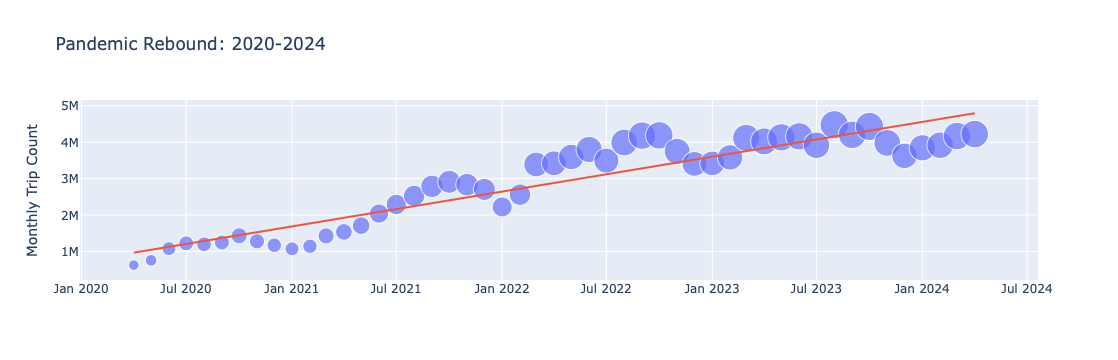

In [641]:
#Pandemic Rebound 
trips_month['Datetime']= trips_month['Year'].astype(str) + trips_month['Month'].astype(str)
trips_month['Datetime'] = pd.to_datetime(trips_month['Datetime'], format = '%Y%m')
trips_month[trips_month['Datetime'] > '2020-03-01'].head(2)
reg = trips_month[trips_month['Datetime'] > '2020-03-01']
regols = LinearRegression()
regols.fit(reg[['Datetime']],reg['Trip Count'])
print(regols.intercept_)
print(regols.coef_)
reg
reg_scat = px.scatter(reg,
                         x="Datetime", 
                         y="Trip Count",
                         labels={"Datetime":"","Trip Count":"Monthly Trip Count"},
                         trendline="ols", trendline_scope="overall",
                      size = 'Trip Count',
                         title = "Pandemic Rebound: 2020-2024")
reg_scat.update_layout(showlegend=False)
reg_scat.show()
reg_scat.write_image("images/reg_scat.png")
reg_scat.write_image("images/reg_scat.svg")

In [477]:
#Avg Monthly Growth per Year regression line
(3118053 - 2653544)*2

929018

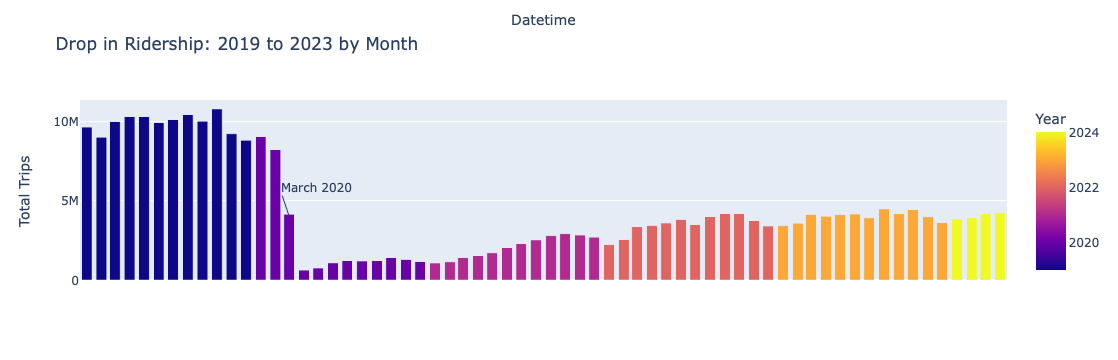

In [642]:
# Visualization: Bart 2019-2023 by Month

month = px.bar(trips_month[trips_month['Year'] >= 2019], x = "Datetime",
             y='Trip Count',labels={"Trip Count" : "Total Trips", "index" : "Month"}, 
             title = "Drop in Ridership: 2019 to 2023 by Month", color = 'Year',
              )

month.update_xaxes(showticklabels=False)
month.add_annotation(
    x="2020-03-01", y = 4000000,
    text="March 2020",
    showarrow=True,
    xanchor="left")
month.show()
month.write_html("images/covid_drop.html")
month.write_image("images/covid_drop.png")
month.write_image("images/covid_drop.svg")

### Downtown Daily

In [484]:
# SF func def
SF_stations = ['EMBR','MONT','POWL','CIVC','16TH','24TH','GLEN','BALB','DALY','COLM','SSAN','SBRN','SFIA','MLBR']

def SF(x):
    '''
    Simple function to seprate stations in SF = 1, and Not in SF = 0
    '''
    if x in SF_stations:
        return 1
    else:
        return 0

In [485]:
#Pull data for stations with origin or destination as SF downtown

SF_downton = ['EMBR','MONT','POWL','CIVC']
downtown_summary = []
for i in [2019, 2022, 2023]:
    df = pd.read_csv('date-hour-soo-dest-' + str(i) + '.csv')
    df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day_name()
    df['Day Num'] = df['Date'].dt.dayofweek
    df['Month Name'] = df['Date'].dt.month_name()
    df['Year'] = df['Date'].dt.year
    df = df[(df['Origin Station'].isin(SF_downton)) | (df['Destination Station'].isin(SF_downton))]
    df['Commute'] = df['Hour'].apply(lambda x: 'AM' if 4 < x <13 else 'PM')
    df['Origin_SF'] = df['Origin Station'].apply(SF)
    df['Destination_SF'] = df['Destination Station'].apply(SF)
    df['Transbay'] = df['Origin_SF'] + df['Destination_SF']
    df['Transbay'] = df['Transbay'].apply(lambda x: 'Y' if x == 1 else 'N')
    downtown_summary.append(df)

In [486]:
#concat to create DF: 
downtown_master = pd.concat([downtown_summary[0],downtown_summary[1][downtown_summary[1]['Month']>4], downtown_summary[2][downtown_summary[2]['Month']<5]])
downtown_master.loc[downtown_master['Year'].isin([2022,2023]),'Year']= '2022'
downtown_master.loc[downtown_master['Year']== 2019,'Year'] = '2019'
downtown_master.head(2)

/var/folders/xk/t8xh_8wx1pl_j7g1mtmxhnc40000gn/T/ipykernel_62745/2147282835.py:3: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2022' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.



,Date,Hour,Origin Station,Destination Station,Trip Count,Month,Day,Day Num,Month Name,Year,Commute,Origin_SF,Destination_SF,Transbay
4,2019-01-01,0,12TH,CIVC,2,1,Tuesday,1,January,2019,PM,0,1,Y
10,2019-01-01,0,12TH,EMBR,7,1,Tuesday,1,January,2019,PM,0,1,Y


In [487]:
# Pivoting data
mont2 = downtown_master[((downtown_master['Destination Station']=='MONT') 
                 | (downtown_master['Origin Station']=='MONT')) 
               ].groupby(['Year','Day Num','Day','Date','Hour'])['Trip Count'].sum().reset_index().groupby(
                   ['Year','Day','Hour'])['Trip Count'].mean().reset_index()
mont2['Station'] = 'MONT'
pow2 = downtown_master[((downtown_master['Destination Station']=='POWL') 
                 | (downtown_master['Origin Station']=='POWL')) 
               ].groupby(['Year','Day Num','Day','Date','Hour'])['Trip Count'].sum().reset_index().groupby(
                   ['Year','Day','Hour'])['Trip Count'].mean().reset_index()
pow2['Station'] = 'POWL'
emb2 = downtown_master[((downtown_master['Destination Station']=='EMBR') 
                 | (downtown_master['Origin Station']=='EMBR')) 
               ].groupby(['Year','Day Num','Day','Date','Hour'])['Trip Count'].sum().reset_index().groupby(
                   ['Year','Day','Hour'])['Trip Count'].mean().reset_index()
emb2['Station'] = 'EMBR'
civ2 = downtown_master[((downtown_master['Destination Station']=='CIVC') 
                 | (downtown_master['Origin Station']=='CIVC')) 
               ].groupby(['Year','Day Num','Day','Date','Hour'])['Trip Count'].sum().reset_index().groupby(
                   ['Year','Day','Hour'])['Trip Count'].mean().reset_index()
civ2['Station'] = 'CIVC'
all2 = pd.concat([mont2,pow2,emb2,civ2])
all2.head(2)

,Year,Day,Hour,Trip Count,Station
0,2019,Friday,0,309.826923,MONT
1,2019,Friday,1,75.250000,MONT


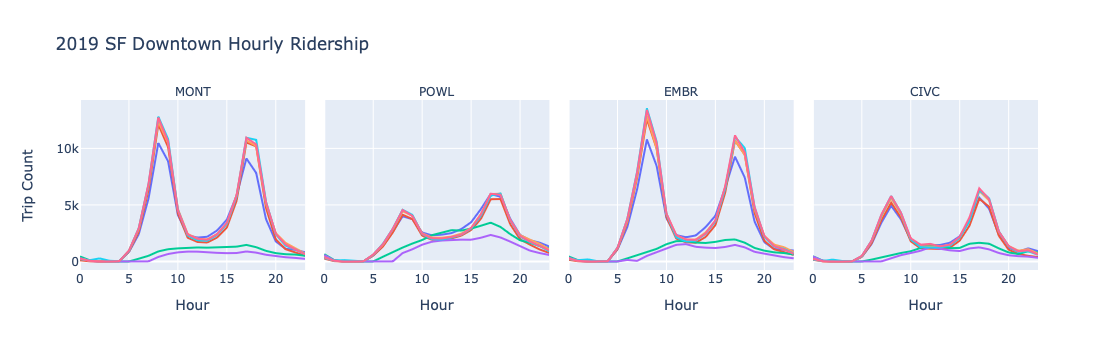

In [525]:
#2019, station, hour, avg trips per hour, SF Downtown
all_line2019 = px.line(all2[all2['Year']=='2019'], x="Hour", y="Trip Count", color='Day', 
                    facet_col = 'Station', title = "2019 SF Downtown Hourly Ridership",width=900, height=350)
all_line2019.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
all_line2019.update_layout(showlegend = False)
all_line2019.show()
all_line2019.write_image("images/all_line2019.png")
all_line2019.write_html("images/all_line2019.html")
all_line2019.write_image("images/all_line2019.svg")

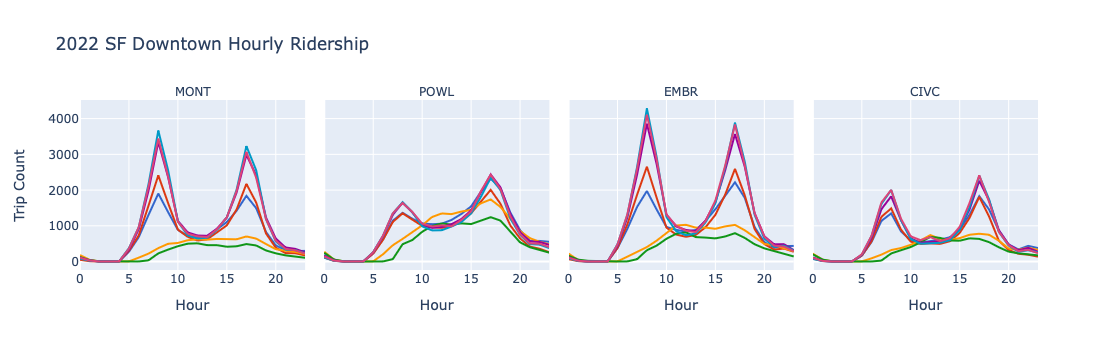

In [526]:
#2022, station, hour, avg trips per hour, SF Downtown
all_line2022 = px.line(all2[all2['Year']=='2022'], x="Hour", y="Trip Count", 
                    color='Day', color_discrete_sequence=px.colors.qualitative.G10, facet_col = 'Station', 
                       title = "2022 SF Downtown Hourly Ridership",width=900, height=350)
all_line2022.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
all_line2022.update_layout(showlegend = False)
all_line2022.show()
all_line2022.write_image("images/all_line2022.png")
all_line2022.write_html("images/all_line2022.html")
all_line2022.write_image("images/all_line2022.svg")

In [587]:
#Weekend percentage of total volume
day_2022_2019 = (all2.groupby(['Year','Station','Day'])['Trip Count'].sum()/\
all2.groupby(['Year','Station','Day'])['Trip Count'].sum().reset_index().groupby(['Year','Station'])['Trip Count'].sum()).reset_index()
day_2022_2019[day_2022_2019['Day'].isin(['Saturday','Sunday'])].groupby(['Year','Station'])['Trip Count'].sum()

Year  Station
2019  CIVC       0.122205
      EMBR       0.084036
      MONT       0.063577
      POWL       0.191510
2022  CIVC       0.170480
      EMBR       0.137544
      MONT       0.115254
      POWL       0.232319
Name: Trip Count, dtype: float64

In [595]:
#Weekday percentage of total volume
day_2022_2019 = (all2.groupby(['Year','Station','Day'])['Trip Count'].sum()/\
all2.groupby(['Year','Station','Day'])['Trip Count'].sum().reset_index().groupby(['Year','Station'])['Trip Count'].sum()).reset_index()
day_2022_2019[day_2022_2019['Day'].isin(['Saturday','Sunday'])].groupby(['Year','Station'])['Trip Count'].sum()-1

Year  Station
2019  CIVC      -0.877795
      EMBR      -0.915964
      MONT      -0.936423
      POWL      -0.808490
2022  CIVC      -0.829520
      EMBR      -0.862456
      MONT      -0.884746
      POWL      -0.767681
Name: Trip Count, dtype: float64

In [610]:
#Powell weekend bounceback
all2.groupby(['Year','Station','Day'])['Trip Count'].sum().reset_index()[(all2.groupby(['Year','Station','Day'])['Trip Count'].sum().reset_index()\
['Station'] == 'POWL') & (all2.groupby(['Year','Station','Day'])['Trip Count'].sum().reset_index()\
['Day'].isin(['Saturday','Sunday']))].groupby(['Year','Station'])['Trip Count'].sum().reset_index().loc[1,'Trip Count']/all2.groupby(['Year','Station','Day'])['Trip Count'].sum().reset_index()[(all2.groupby(['Year','Station','Day'])['Trip Count'].sum().reset_index()\
['Station'] == 'POWL') & (all2.groupby(['Year','Station','Day'])['Trip Count'].sum().reset_index()\
['Day'].isin(['Saturday','Sunday']))].groupby(['Year','Station'])['Trip Count'].sum().reset_index().loc[0,'Trip Count']

0.5074835601996338